# Consumer Electronics Sales Forecasting
## **Focus:** Sales forecasting for Fast Moving Consumer Electronics to Optimize Inventory Management and Maximize Profitability.

## **Exploratory Data Analysis**

Main focus for this EDA is on time series analysis on sales as it is key in understanding trends over time. This is to identify 
- Patterns
- Seasonality

In [28]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv(r"C:\Users\hp\Downloads\redertelecomchurn\ElectroForecasting\DataCleaning\cleaned_data.csv")

In [29]:
data.dtypes

Product_ID                     int64
Category                      object
Price                        float64
Date                          object
Season                        object
Market_Trend_Index           float64
Competitor_Activity_Score    float64
Consumer_Confidence_Index    float64
Product_Specification_1       object
Product_Specification_2       object
Sales_Volume                   int64
dtype: object

### Identifying total sales for each product category across time 
Group the dataset by `Date` and `Category` and sum the `Sales_Volume` and store this is in `sales_by_date_category`. So that only the total sales volume per day, of each product category is captured in `sales_by_date_category`.

In [30]:
sales_by_date_category = data.groupby(['Date', 'Category']).sum()['Sales_Volume'].reset_index()


In [31]:
sales_by_date_category['Category'].unique().tolist()

['Accessories', 'Laptop', 'Smartphone', 'Tablet']

C:\Users\hp\AppData\Local\Temp\ipykernel_12956\98067643.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_by_date_smartphone['Date'] = sales_by_date_smartphone['Date'].astype('datetime64[ns]')


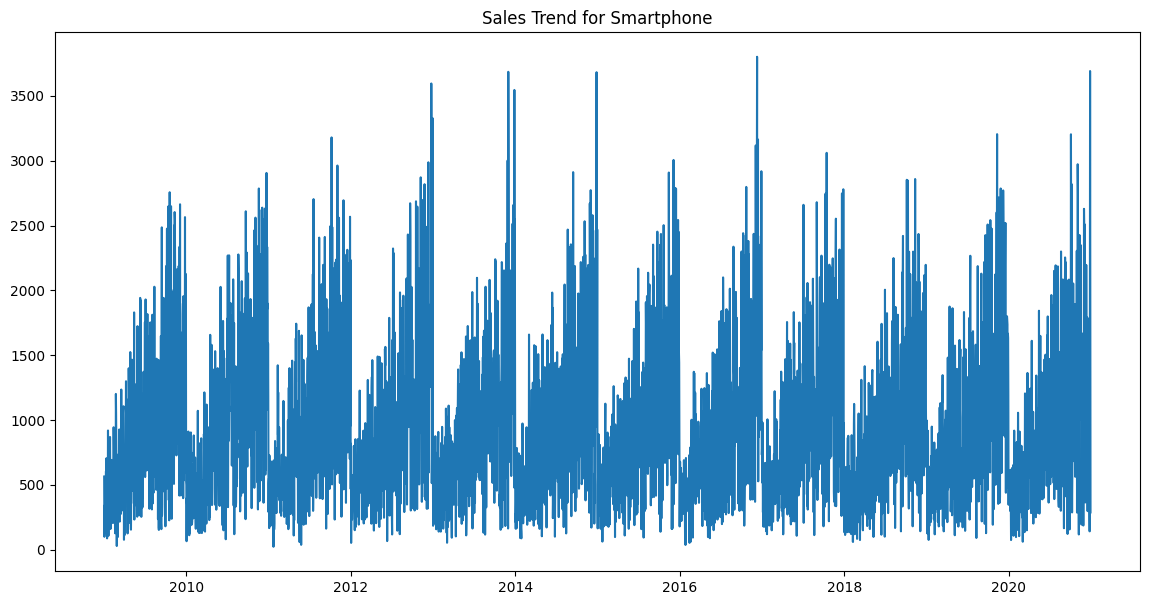

In [32]:
plt.figure(figsize = [14,7])
sales_by_date_smartphone =sales_by_date_category[sales_by_date_category['Category'] == 'Smartphone']
sales_by_date_smartphone['Date'] = sales_by_date_smartphone['Date'].astype('datetime64[ns]')
plt.plot(sales_by_date_smartphone['Date'], sales_by_date_smartphone['Sales_Volume'])
plt.title("Sales Trend for Smartphone")
# plt.xticks(2009, 2020)
plt.show()

In [33]:
sales_by_date_smartphone['Date'].dt.year.max()

np.int32(2020)

In [70]:
sales_by_date_category.to_csv('data_category_data.csv', index = False)

### Visualize trend for each product category. 
This is to easily identify the season or period of high sales and low sales for each product category.

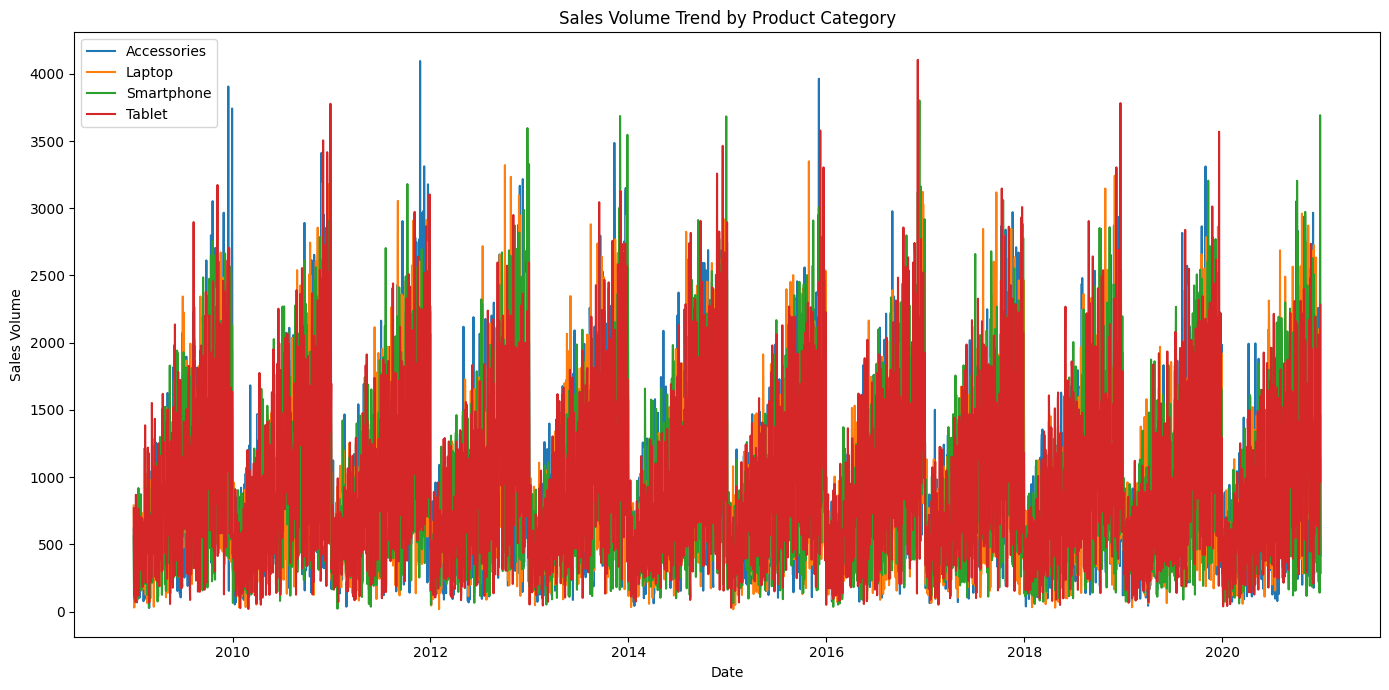

In [35]:
plt.figure(figsize=(14, 7))
for category in sales_by_date_category['Category'].unique().tolist():
    subset = sales_by_date_category[sales_by_date_category['Category'] == category]
    plt.plot(pd.to_datetime(subset['Date']), subset['Sales_Volume'], label=category)

plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.title('Sales Volume Trend by Product Category')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
[1,2,3,4,5]

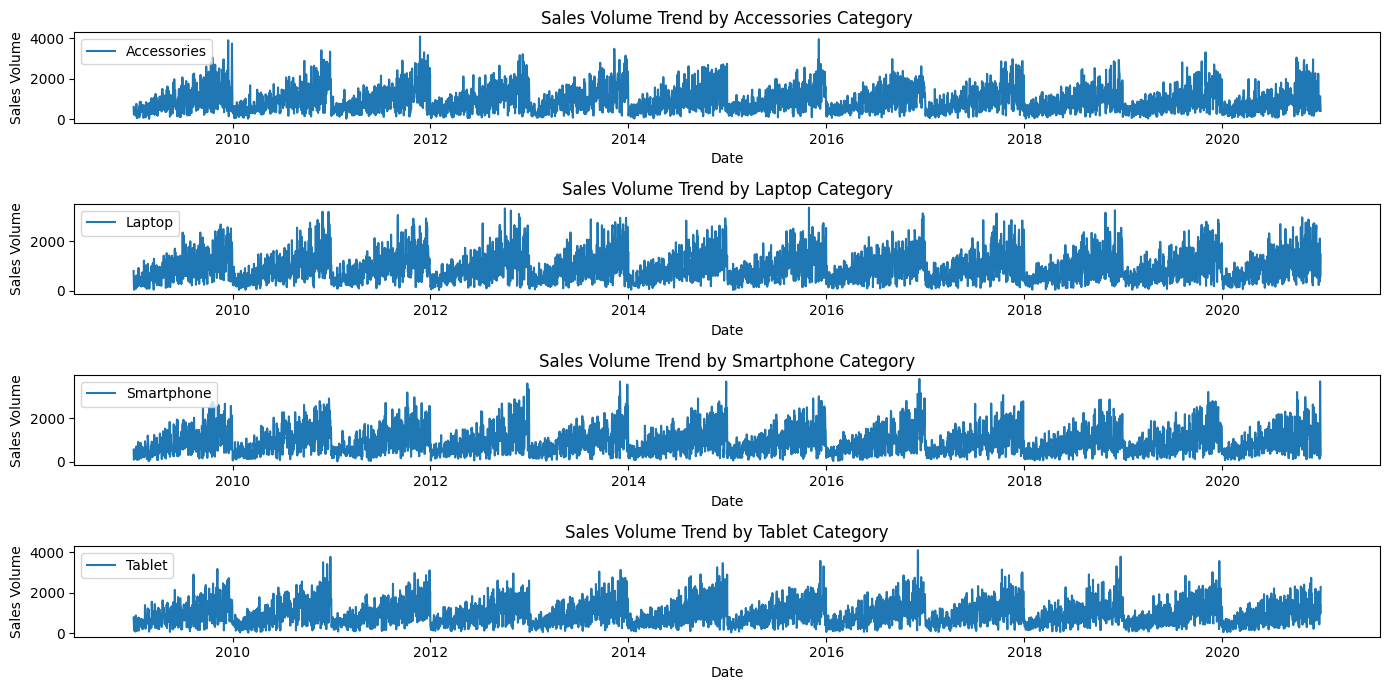

In [39]:
cat = len(sales_by_date_category['Category'].unique())

plt.figure(figsize=(14, 7))

for i, category in enumerate(sales_by_date_category['Category'].unique().tolist()):
    
    subset = sales_by_date_category[sales_by_date_category['Category'] == category]
    
    plt.subplot(4, 1, i + 1)
    
    plt.plot(pd.to_datetime(subset['Date']), subset['Sales_Volume'], label=category)
    plt.xlabel('Date')
    plt.ylabel('Sales Volume')
    plt.title(f'Sales Volume Trend by {category} Category')
    plt.legend()
    plt.tight_layout()
plt.show()

### Identify the sales pattern on the monthly perspective
To narrow down the analysis, we want to see this sales patterns on monthlyview.
- Group product category on sales by months.
- Visualize the trend to identify hidden patterns

In [ ]:
sales_by_date_category['Date'] = pd.to_datetime(sales_by_date_category['Date'])

sales_by_month_category = sales_by_date_category.copy()

sales_by_month_category['Date'] = sales_by_month_category['Date'].dt.to_period('M')

In [55]:
sales_by_month_category = sales_by_month_category.groupby(['Date', 'Category']).sum()['Sales_Volume'].reset_index()

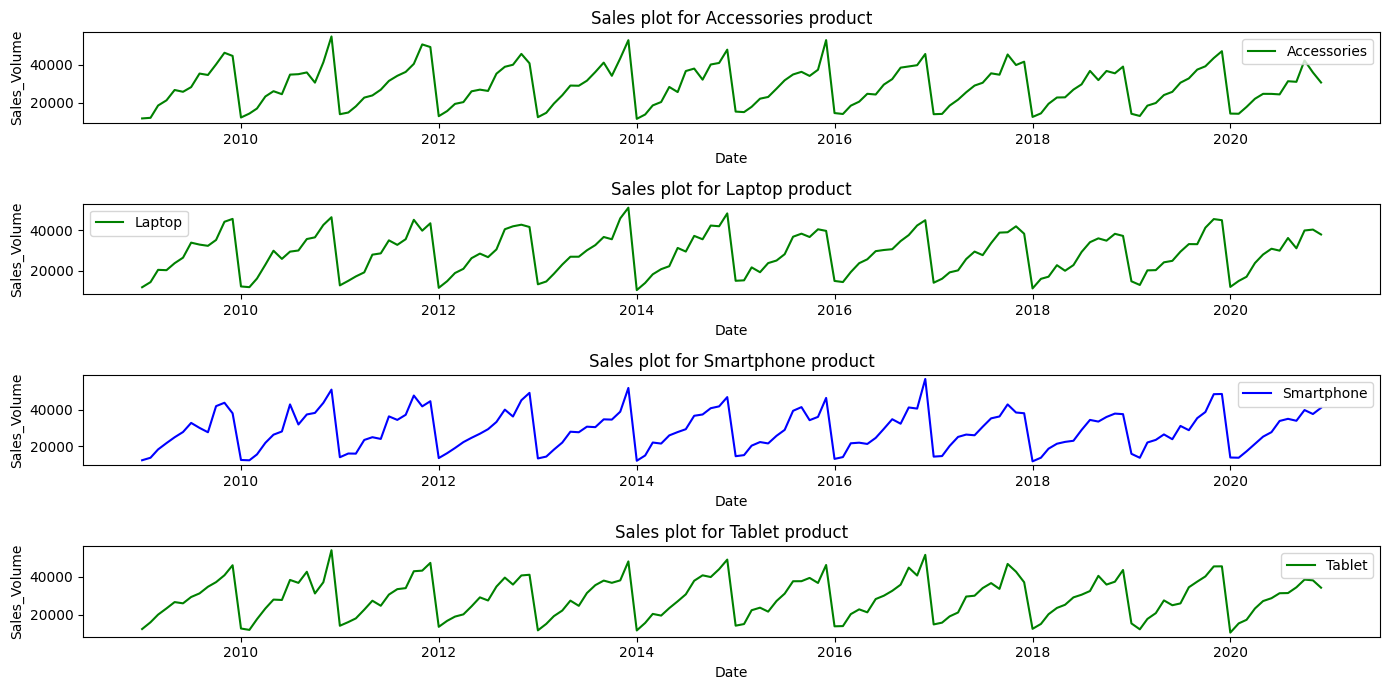

In [69]:
import random
plt.figure(figsize=(14, 7))

# sales_by_month_category['Date'] = sales_by_month_category['Date'].dt.to_timestamp()


colors = ['green', 'blue', 'yellow']

for i, category in enumerate(sales_by_month_category['Category'].unique().tolist()):
    subset = sales_by_month_category[sales_by_month_category['Category'] == category]
    
    plt.subplot(4, 1, i + 1)
    plt.plot(subset['Date'], subset['Sales_Volume'], label = category, color = random.choice(colors))
    plt.title(f'Sales plot for {category} product')
    plt.xlabel('Date')
    plt.ylabel('Sales_Volume')
    plt.legend()
    plt.tight_layout()
plt.show()
    

### Analysis on Market Trend Index: visualize the Trend index across periods for each product category
A market trend index is a numerical or categorical indicator used to represent the overall direction, behavior, or sentiment of a market over a specific period of time.

### Analysis on Competitor Activity Score: visualize the activity across periods for each product category.
This is to identify the product sales seasonality trend for our competitors. 

A Competitor Activity Score is a numerical representation that reflects how active or aggressive a company’s competitors are in the market during a specific time period


### Correlation between Market Trend Index and Competitor Activity Score on Sales
Measure how strongly Market Trend Index and Competitor Activity Score relate to Sales Volume.

### Overall Insight Breakdown from Our Exploratory Data Analysis